<a href="https://colab.research.google.com/github/hajarnabil/egfwd/blob/main/Copy_of_Classification_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Hajar Nabil El-Sherbeny

ID: 46-20359

Tutorial: T-01

---

Name: Mayar Hossam El-din Galal

ID: 46-15920

Tutorial: T-01

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2021/main/data/telecom_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,$84.8/m,$1990.5,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),$103.2/m,$7362.9,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,$29.6/m,$346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,$74.4/m,$306.6,Yes


## Data Inspection

In [ ]:
#To check the sum of null values in the dataframe
df.isnull().sum()

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64

In [ ]:
#To identify which attributes contain null values
df.isnull().any()

customerID           True
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [ ]:
#Drop customer ID since they are unique and will not affect other attributes. They also contain null values so dropping them is a way of data cleaning in the dataframe
df.drop(['customerID'], axis="columns", inplace=True)

In [ ]:
df.describe()

,SeniorCitizen,tenure
count,7032.000000,7032.000000
mean,0.162400,32.421786
std,0.368844,24.545260
min,0.000000,1.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [ ]:
df.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,6180,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,1584,5783,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,$20.05/m,$19.65,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,61,8,5163


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7032 non-null   object
 1   SeniorCitizen     7032 non-null   int64 
 2   Partner           7032 non-null   object
 3   Dependents        7032 non-null   object
 4   tenure            7032 non-null   int64 
 5   PhoneService      7032 non-null   object
 6   MultipleLines     7032 non-null   object
 7   InternetService   7032 non-null   object
 8   OnlineSecurity    7032 non-null   object
 9   OnlineBackup      7032 non-null   object
 10  DeviceProtection  7032 non-null   object
 11  TechSupport       7032 non-null   object
 12  StreamingTV       7032 non-null   object
 13  StreamingMovies   7032 non-null   object
 14  Contract          7032 non-null   object
 15  PaperlessBilling  7032 non-null   object
 16  PaymentMethod     7032 non-null   object
 17  MonthlyCharges

In [ ]:
df.dtypes

gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

In [ ]:
df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [ ]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [ ]:
#To know the possible types of data in each attribute
CatColumn = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        CatColumn.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


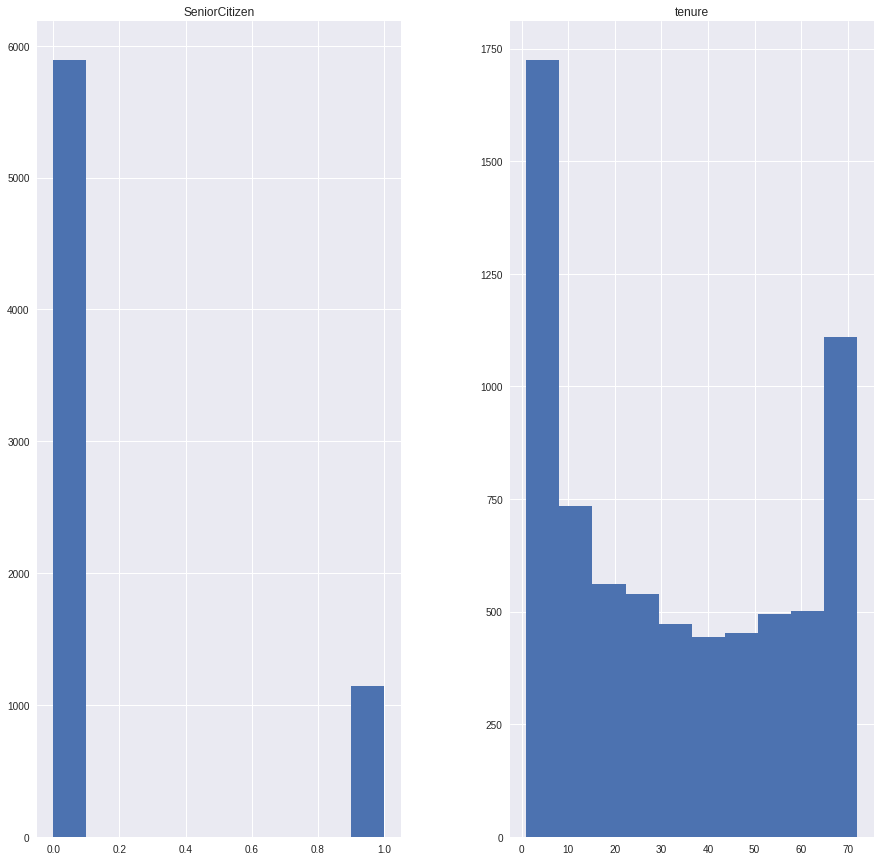

In [ ]:
#Visualizing the distibution of the data for every attribute
df.hist(figsize=(15, 15));

## Data Pre-processing

In [ ]:
#Renaming attributes with their units
df = df.rename(columns={'MonthlyCharges':'MonthlyCharges($)', 'TotalCharges':'TotalCharges($)'})
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges($),TotalCharges($),Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,$84.8/m,$1990.5,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),$103.2/m,$7362.9,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,$29.6/m,$346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,$74.4/m,$306.6,Yes


In [ ]:
#To remove units from the data in renamed attributes
df['MonthlyCharges($)']=df['MonthlyCharges($)'].str.replace('$', '')
df['MonthlyCharges($)']=df['MonthlyCharges($)'].str.replace('/m', '')
df['TotalCharges($)']=df['TotalCharges($)'].str.replace('$', '')
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges($),TotalCharges($),Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.8,1990.5,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.2,7362.9,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.6,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.4,306.6,Yes


In [ ]:
#Change data type from object to numeric values int/float but in this case float since the data contains decimal values
df['MonthlyCharges($)'] = pd.to_numeric(df['MonthlyCharges($)'])
df['TotalCharges($)']=pd.to_numeric(df['TotalCharges($)'])
df['tenure']=pd.to_numeric(df['tenure'])

In [ ]:
#Encoding the binary 'Churn' column into its numerical equivalent form
df['Churn'] = df['Churn'].astype('category').cat.codes
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int8

In [ ]:
#Encoding the binary 'gender' column into its numerical equivalent form
df['gender'] = df['gender'].astype('category').cat.codes
df['gender']

0       0
1       1
2       1
3       1
4       0
       ..
7027    1
7028    0
7029    0
7030    1
7031    1
Name: gender, Length: 7032, dtype: int8

In [ ]:
#Encoding the remaining attributes in the dataframe
df['Partner'] = df['Partner'].astype('category').cat.codes
df['Dependents'] = df['Dependents'].astype('category').cat.codes
df['PhoneService'] = df['PhoneService'].astype('category').cat.codes
df['OnlineSecurity'] = df['OnlineSecurity'].astype('category').cat.codes
df['OnlineBackup'] = df['OnlineBackup'].astype('category').cat.codes
df['DeviceProtection'] = df['DeviceProtection'].astype('category').cat.codes
df['TechSupport'] = df['TechSupport'].astype('category').cat.codes
df['StreamingTV'] = df['StreamingTV'].astype('category').cat.codes
df['StreamingMovies'] = df['StreamingMovies'].astype('category').cat.codes
df['PaperlessBilling'] = df['PaperlessBilling'].astype('category').cat.codes
df['MultipleLines'] = df['MultipleLines'].astype('category').cat.codes

In [ ]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
df['Churn'].value_counts() / df['Churn'].count()

0    0.734215
1    0.265785
Name: Churn, dtype: float64

In [ ]:
df.dtypes

gender                  int8
SeniorCitizen          int64
Partner                 int8
Dependents              int8
tenure                 int64
PhoneService            int8
MultipleLines           int8
InternetService       object
OnlineSecurity          int8
OnlineBackup            int8
DeviceProtection        int8
TechSupport             int8
StreamingTV             int8
StreamingMovies         int8
Contract              object
PaperlessBilling        int8
PaymentMethod         object
MonthlyCharges($)    float64
TotalCharges($)      float64
Churn                   int8
dtype: object

In [ ]:
#To fill the null values in the 'TotalCharges($)' attribute by calculating their mean
df.update(df['TotalCharges($)'].fillna(value=df['TotalCharges($)'].mean(), inplace=True))

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

In [ ]:
corr = df.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges($),TotalCharges($),Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,-0.011902,-0.013779,0.004488,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,0.156258,0.219874,0.092794,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,-0.013957,0.097825,0.302795,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,-0.110131,-0.112343,0.059334,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.004823,0.246862,0.776992,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.016696,0.248033,0.107156,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.165306,0.433905,0.423522,0.038043
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,-0.157723,-0.053576,0.241728,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,-0.012697,0.119943,0.349289,-0.195290
DeviceProtection,0.001348,-0.021124,0.165614,0.079723,0.372669,0.004718,0.122614,0.175789,0.187646,1.000000,0.240476,0.275947,0.289309,-0.037596,0.163984,0.362489,-0.177883


In [ ]:
corr['Churn'].sort_values(ascending=False, key=lambda x: x.abs())

Churn                1.000000
tenure              -0.354049
OnlineSecurity      -0.289050
TechSupport         -0.282232
OnlineBackup        -0.195290
MonthlyCharges($)    0.192858
PaperlessBilling     0.191454
TotalCharges($)     -0.188053
DeviceProtection    -0.177883
Dependents          -0.163128
SeniorCitizen        0.150541
Partner             -0.149982
StreamingMovies     -0.038802
MultipleLines        0.038043
StreamingTV         -0.036303
PhoneService         0.011691
gender              -0.008545
Name: Churn, dtype: float64

**Visualization**

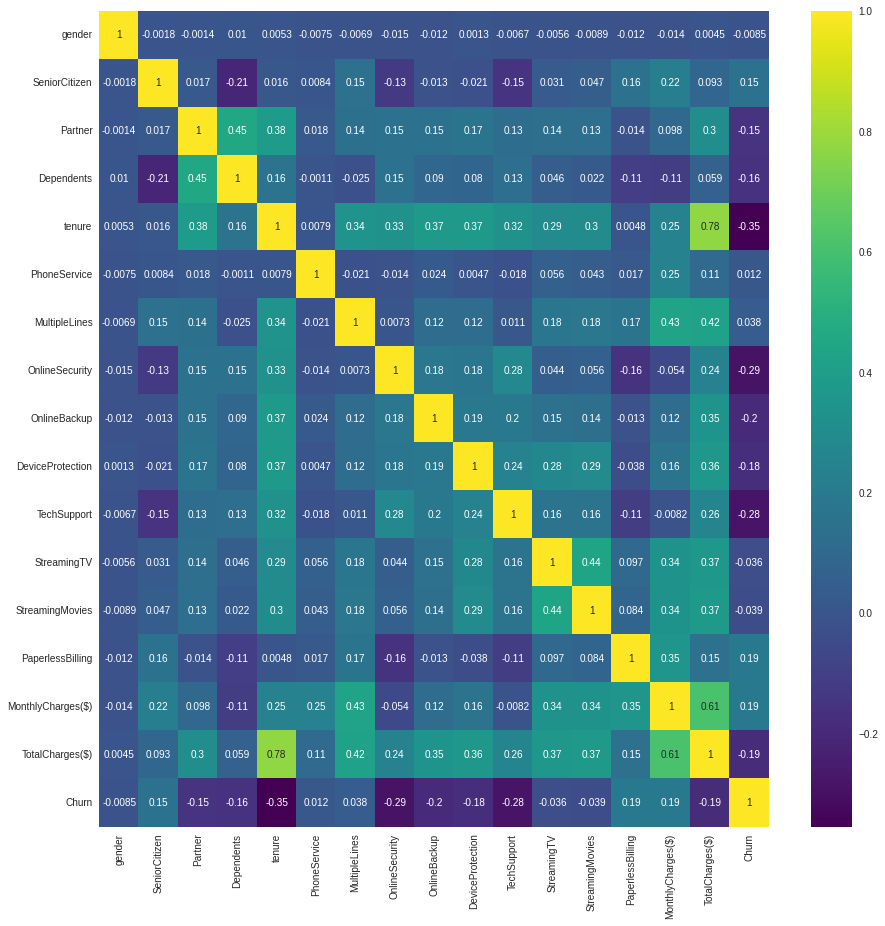

In [ ]:
#To represent the correlation between the attributes in the dataframe and the Churn by using a heatmap
f = plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='viridis', annot=True);

**Answer for Q1**: MonthlyCharges($) and PaperlessBilling

(*Both with the highest values of 0.19*)

**Q2: Which payment method has the highest churn rate?**

**Visualization**

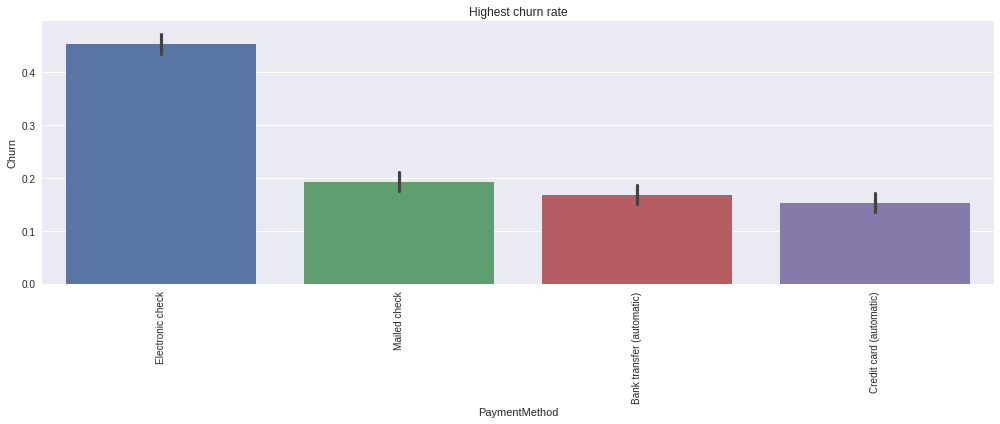

In [ ]:
#To represent the relationship between the payment methods used by customers and the customer Churn rate by using a barplot
f = plt.figure(figsize=(14,6))
sns.barplot(x='PaymentMethod', y='Churn', data=df).set(title='Highest churn rate')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q2**: Electronic Check 

(*It has the highest churn rate with value of around 0.45*)

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

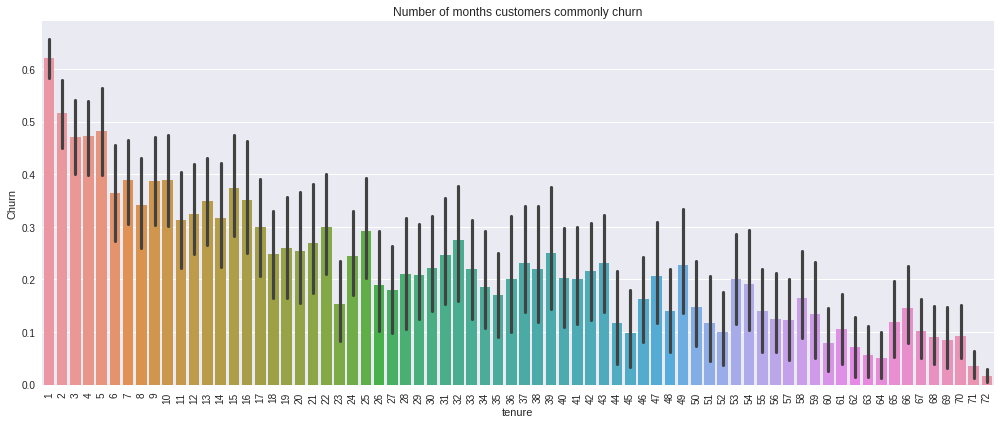

In [ ]:
#To represent the customer Churn rate distribution per every month by using a barplot
f = plt.figure(figsize=(14,6))
sns.barplot(x='tenure', y='Churn', data=df).set(title='Number of months customers commonly churn')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q3**: after the first month

## Modelling

In [ ]:
#This section represents the modelling of the values of the attributes in the dataframe to prepare it for the Evaluation and the presentation of the Decision Tree Visualization.

In [ ]:
df_encoded = df.copy()

In [ ]:
#To know the possible types of data in each attribute
CatColumn = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        CatColumn.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
df_encoded = pd.get_dummies(df_encoded, columns=CatColumn)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int8   
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int8   
 3   Dependents                               7032 non-null   int8   
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int8   
 6   MultipleLines                            7032 non-null   int8   
 7   OnlineSecurity                           7032 non-null   int8   
 8   OnlineBackup                             7032 non-null   int8   
 9   DeviceProtection                         7032 non-null   int8   
 10  TechSupport                              7032 no

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## Evaluation

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


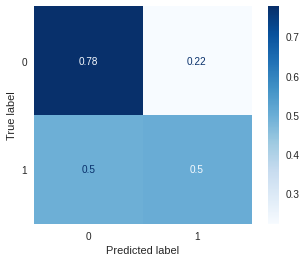

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree_clf, X_test, y_test, cmap='Blues', normalize='true')
plt.grid(False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

clf = DecisionTreeClassifier(random_state=42)
# since we have a relatively small dataset (~1000 records), 
# we'll use a low number of splits
skf = StratifiedKFold(n_splits=3)

# Note how cross validation is applied on the training dataset
# The testing dataset is always left out and used -only- in the final evaluation
scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring='f1')
scores

array([0.51376147, 0.50402762, 0.48593926])

In [ ]:
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Score: 0.50 (+/- 0.02)


## Decision Tree Visualization

In [ ]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.86%
_________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.998342     0.999233  0.998578     0.998787      0.998579
recall        0.999723     0.995413  0.998578     0.997568      0.998578
f1-score      0.999032     0.997319  0.998578     0.998176      0.998577
support    3614.000000  1308.000000  0.998578  4922.000000   4922.000000
_________________
Confusion Matrix: 
 [[3613    1]
 [   6 1302]]

Test Result:
Accuracy Score: 70.43%
_________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.811868    0.449761  0.704265     0.630814      0.715592
recall        0.777276    0.502674  0.704265     0.639975      0.704265
f1-score      0.794195    0.474747  0.704265     0.634471      0.709262
support    1549.000000  561.000000  0.704265  2110.000000   2110.000000
_________________
Confusion Matrix: 
 [[1204  345]
 [ 

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True) 
graph = graphviz.Source(dot_data)
graph 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="recall", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 80.66%
_________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.873038     0.631462  0.806583     0.752250      0.808840
recall        0.861926     0.653670  0.806583     0.757798      0.806583
f1-score      0.867446     0.642374  0.806583     0.754910      0.807634
support    3614.000000  1308.000000  0.806583  4922.000000   4922.000000
_________________
Confusion Matrix: 
 [[3115  499]
 [ 453  855]]

Test Result:
Accuracy Score: 77.82%
_________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.844048    0.586271  0.778199     0.715160      0.775511
recall        0.856036    0.563280  0.778199     0.709658      0.778199
f1-scor

## Bonus (Optional)

In [ ]:
from sklearn.linear_model import LogisticRegression

lreg_model = LogisticRegression()

In [ ]:
lreg_model.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
print_score(lreg_model, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 79.24%
_________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.853147    0.614525  0.792417     0.733836      0.789703
recall        0.866365    0.588235  0.792417     0.727300      0.792417
f1-score      0.859705    0.601093  0.792417     0.730399      0.790946
support    1549.000000  561.000000  0.792417  2110.000000   2110.000000
_________________
Confusion Matrix: 
 [[1342  207]
 [ 231  330]]



81% is higher than accuracy level obtained from the decision tree.

In [ ]:
#Everything below is just a trial

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

make_le = LabelEncoder()
df_encoded['InternetService'] = make_le.fit_transform(df['InternetService'])

model_le = LabelEncoder()
df_encoded['Contract'] = model_le.fit_transform(df['Contract'])

trim_le = LabelEncoder()
df_encoded['PaymentMethod'] = trim_le.fit_transform(df['PaymentMethod'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_encoded.drop('Churn',axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

linearReg = LinearRegression()
linearReg.fit(X_train, y_train);

In [ ]:
y_pred = linearReg.predict(X_test)

In [ ]:
y_pred_sk = linearReg.predict(X_test)

#Evaluation: 
#MSE
from sklearn.metrics import mean_squared_error
J_MSE_sk = mean_squared_error(y_pred_sk, y_test)

#Rsquare
R_square_sk = linearReg.score(X_test,y_test)

print('The Mean Square Error(MSE) or J(beta) is: ', J_MSE_sk)
print('R square obtain for scikit learn library is :', R_square_sk)

The Mean Square Error(MSE) or J(beta) is:  0.14259317779494426
R square obtain for scikit learn library is : 0.2916360725201287


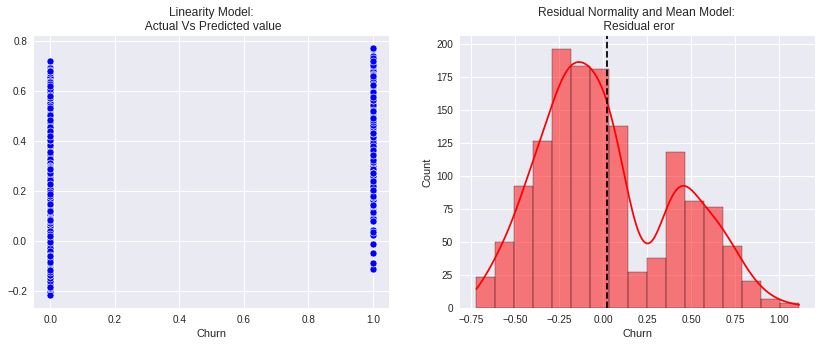

In [ ]:
#Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred_sk, ax=ax, color='blue')
ax.set_title('Linearity Model:\n Actual Vs Predicted value')

#Checking for residual normality and mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred_sk), ax=ax, color='red', kde=True)
ax.axvline((y_test - y_pred_sk).mean(), color='k', linestyle='--')
ax.set_title('Residual Normality and Mean Model: \n Residual eror');

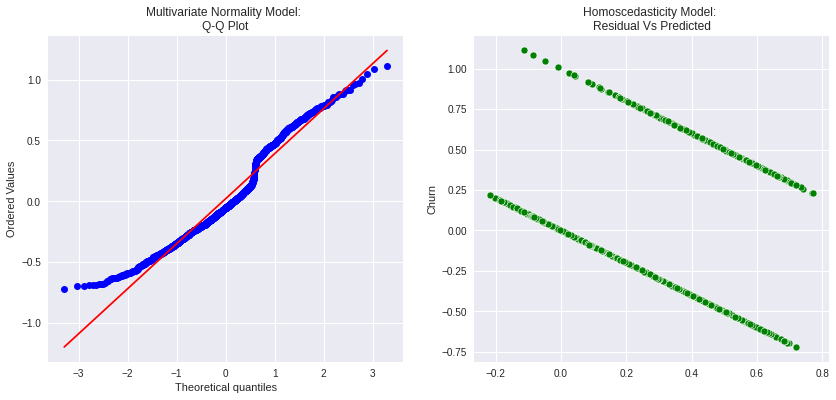

In [ ]:
#Checking for Multivariate Normality
#Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk), fit=True, plot=ax[0])
ax[0].set_title('Multivariate Normality Model: \nQ-Q Plot')

#Checking for Homoscedasticity
sns.scatterplot(x=y_pred_sk, y=(y_test - y_pred_sk), ax=ax[1], color='green') 
ax[1].set_title('Homoscedasticity Model: \nResidual Vs Predicted');

In [ ]:
#Checking for Multicollinearity
#Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF_data = pd.DataFrame()
VIF_data['feature'] = X.columns 

VIF_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF_data

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,feature,VIF
0,gender,1.935554
1,SeniorCitizen,1.368920
2,Partner,2.818304
3,Dependents,1.953547
4,tenure,11.681506
5,PhoneService,14.588927
6,MultipleLines,2.756983
7,InternetService,4.332441
8,OnlineSecurity,2.248413
9,OnlineBackup,2.443936


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 5))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 10)), 
}

logreg = DecisionTreeClassifier(random_state=42)
logreg_cv = GridSearchCV(logreg, params, scoring="recall", n_jobs=-1, verbose=1, cv=3)
logreg_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

logreg_clf = DecisionTreeClassifier(**best_params)
logreg_clf.fit(X_train, y_train)
print_score(logreg_clf, X_train, y_train, X_test, y_test, train=True)
print_score(logreg_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 80.41%
_________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.821617     0.710586  0.804089     0.766101      0.792482
recall        0.938057     0.427507  0.804089     0.682782      0.804089
f1-score      0.875985     0.533841  0.804089     0.704913      0.786206
support    4149.000000  1476.000000  0.804089  5625.000000   5625.000000
_________________
Confusion Matrix: 
 [[3892  257]
 [ 845  631]]

Test Result:
Accuracy Score: 78.04%
_________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.791563    0.712121  0.780384     0.751842      0.769374
recall        0.943787    0.358779  0.780384     0.651283      0.780384
f1-score 